# Autor: Pablo Veloz
# Desafío - Gráficos

# 1. Genere una submuestra de casos
* Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.

In [1]:
import random
rut = "16.123.929-1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
df=pd.read_csv("qog_std_cs_jan18.csv")
#import lec4_graphs as gfx
# np.random.seed(9291)

In [547]:
#random.seed(4)
#lista_rut = random.sample(lista_rut, 4)
#semilla=""

#for i in lista_rut:
#    semilla+=i
#print("Lista semilla Ultimos 4 digitos: ", semilla)
#lista_casos=[]

# Cada base generada debe contener los siguientes elementos:
* índice de desarrollo humano ( undp_hdi )
* El nombre del país ( ccodealp )
* La región a la que pertenece ( ht_region )
* El PIB per capita. ( gle_cgdpc )
* El total de la población ( imf_pop )

* Dataframe completo

In [2]:
df.head(5)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [549]:
df["ht_region"]=df["ht_region"].replace([1,2,3,4,5,6,7,8,9,10],["EastEurope","Latam","NorthAfrica","Subsaharian","WesternDem","EastAsia","SouthEastAsia","SouthAsia","Pacific","Caribbean"])

* Dataframe con 50% de los casos

In [550]:
df_base=df.sample(frac=0.5,random_state=9291)

In [551]:
df_base.shape

(97, 1882)

* Base generada con los elementos["undp_hdi","ccodealp","ht_region","gle_cgdpc","imf_pop"] 
* Además como mi apellido es <b>VELOZ</b>  se agregan las variables de modulo educación:
    * wef_imort : Infant mortality, deaths/1000 live births
    * who_alc2000 : Alcohol consumption per capita (2000-)
    * who_tobt : Current smoking of any tobacco product (Total).
    * wdi_exph : Government expenditure on health, total (% of GDP)

In [570]:
df_base_generada=df_base.loc[:,["undp_hdi","ccodealp","ht_region","gle_cgdpc","imf_pop","wef_imort","who_alc2000","who_tobt","wdi_exph","cname"]]
df_base_generada.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,cname
185,0.519,TZA,Subsaharian,1416.30,43.880001,37.700001,4.20,16.299999,5.580116,Tanzania
145,0.762,KNA,Caribbean,11237.75,NaN,NaN,8.68,NaN,5.080365,St Kitts and Nevis
167,0.909,SWE,WesternDem,39000.91,9.645000,2.300000,7.30,21.900000,11.929840,Sweden
132,0.785,PAN,Latam,15137.04,3.788000,15.900000,6.74,7.400000,8.025723,Panama
141,0.855,QAT,NorthAfrica,104049.44,2.045000,6.300000,1.15,NaN,2.187062,Qatar


# Si su apellido está entre la A y la M, escoja las siguientes variables del módulo Educación:
* ffp_hf : Human Flight and Brain Drain
* wef_q
es : Quality of the educational system
* wdi_expedu : Government expenditure on education, total (% of GDP)
* wdi_ners : School enrollment, secondary (% net)

# Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
* wef_imort : Infant mortality, deaths/1000 live births
* who_alc2000 : Alcohol consumption per capita (2000-)
* who_tobt : Current smoking of any tobacco product (Total).
* wdi_exph : Government expenditure on health, total (% of GDP)
* Guarde esta tabla procesada en un nuevo objeto
* Renombre las categorías de la variable ht_region de números a regiones

# 2. Genere una función que ingrese su objeto y devuelva:

* Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos contínuos
* Para cada variable discreta, que calcule la frecuencia.
* Reporte las estadísticas descriptivas para gle_cgdpc , undp_hdi , imf_pop .
* Compare las estadísticas con algún compañero. ¿Ve alguna diferencia substancial en alguna de ellas?

* Inspeccionando el tipo de variable de nuestros dataframe

In [572]:
for i in df_base_generada.columns:
    print(i,"es de tipo: ",df_base_generada[i].dtype)
#lista=["undp_hdi","gle_cgdpc","imf_pop"]
   
#len(df_base_generada["undp_hdi"])
#df.dtypes
#df_base_generada.dtypes
#for i in df_base_generada.columns:
#    print(i)


undp_hdi es de tipo:  float64
ccodealp es de tipo:  object
ht_region es de tipo:  object
gle_cgdpc es de tipo:  float64
imf_pop es de tipo:  float64
wef_imort es de tipo:  float64
who_alc2000 es de tipo:  float64
who_tobt es de tipo:  float64
wdi_exph es de tipo:  float64
cname es de tipo:  object


In [554]:
#print(df_base_generada)

def descriptiva1(df):
    """
    -Esta funcion obtiene un df para variables continuas y discretas 
    -Su argumento exige un vector pd.Series
    -Retorna el promedio,varianza y desviacion estandar para variable continua y solo la frecuencia para variable discreta
    """
    lista_cuanti=[]
    lista_cuali=[]
    for colname in df.columns:
        if df[colname].dtype == "float64":
            lista_cuanti.append(colname)
        else:
            lista_cuali.append(colname)

    for colname in lista_cuanti:
        print("VARIABLE CONTINUA: "+colname)
        tmp_describe=df[colname].describe()
        print(tmp_describe)
        print("\n")
        
    for colname in lista_cuali:
        print("VARIABLE DISCRETA :",colname)
        tmp_frec=df[colname].value_counts()
        print(tmp_frec)
        print("\n")

descriptiva1(df_base_generada)

VARIABLE CONTINUA: undp_hdi
count    90.000000
mean      0.697900
std       0.165232
min       0.347000
25%       0.533500
50%       0.737500
75%       0.839750
max       0.924000
Name: undp_hdi, dtype: float64


VARIABLE CONTINUA: gle_cgdpc
count        96.000000
mean      16053.762899
std       19678.988944
min         332.269990
25%        2209.989975
50%        9311.145000
75%       22289.112750
max      108481.130000
Name: gle_cgdpc, dtype: float64


VARIABLE CONTINUA: imf_pop
count     74.000000
mean      23.745986
std       46.113252
min        0.011000
25%        2.278750
50%        6.904500
75%       28.816000
max      318.789001
Name: imf_pop, dtype: float64


VARIABLE CONTINUA: wef_imort
count     73.000000
mean      24.255268
std       26.632336
min        1.700000
25%        4.700000
50%       13.600000
75%       41.099998
max      117.400002
Name: wef_imort, dtype: float64


VARIABLE CONTINUA: who_alc2000
count    89.000000
mean      5.279775
std       4.076143
min       

# 3. Genere una función que liste las observaciones perdidas de una variable
* La función debe contener los siguientes argumentos:
* dataframe : La función debe ingresar un objeto DataFrame.
* var : Variable a inspeccionar.
* print_list : Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser False por defecto.
* La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
* Cuando print_list = True , debe retornar la lista de casos.


In [555]:
def obs_perdidas(dataframe,var,print_list):
    """
    -Esta funcion las observaciones perdidas de una vector df
    -Su argumento exige un vector pd.Series, una varible o columna del dataframe, y un booleano print_list
    -Retorna la variable, la cantidad de elementos nulos y el porcentaje de nulos respecto al largo del vector.
    """
    nulos=dataframe[var].isnull().sum()

    porcentaje=100*(dataframe[var].isnull().sum()/len(dataframe[var]))

    #df_nulos["Porcentaje"]=round(100*porcentaje,3)
    #return nulos,porcentaje
    print("* En",var,"Hay una cantidad de elementos nulos: ",nulos,",Porcentaje: ",porcentaje,"%")
  
    if print_list == True:
        df_vacios=df_base_generada.loc[dataframe[var].isnull()]
        return df_vacios

obs_perdidas(df_base_generada,"undp_hdi",True)

* En undp_hdi Hay una cantidad de elementos nulos:  7 ,Porcentaje:  7.216494845360824 %


,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,cname
89,NaN,PRK,EastAsia,1727.8199,NaN,NaN,3.35,NaN,NaN,"Korea, North"
148,NaN,SMR,WesternDem,42664.2110,0.034,NaN,NaN,NaN,6.129065,San Marino
159,NaN,SOM,Subsaharian,1436.7400,NaN,NaN,0.00,NaN,NaN,Somalia
111,NaN,MCO,WesternDem,108481.1300,NaN,NaN,NaN,NaN,4.337683,Monaco
119,NaN,NRU,Pacific,3130.4700,0.012,NaN,NaN,48.900002,3.326649,Nauru
179,NaN,TUV,Pacific,3174.0500,0.011,NaN,1.34,NaN,16.536638,Tuvalu
37,NaN,TWN,EastAsia,33965.8710,23.434,3.934564,NaN,NaN,NaN,Taiwan


* Analice todas las variables y sus casos perdidos.
* La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.

In [556]:
def color_rojo(value):
    if value < 22:
        color = 'black'
    #elif value > 22:
    #    color = 'red'
    else:
        color = 'red'

    return 'color: %s' % color


def reporte_obs_perdidas(x):
    """
    -Esta funcion reporta todas las observaciones perdidas para un vector pd.Series
    -Su argumento exige solo un vector pd.Series.
    -Retorna la columna, cantidad de elementos nulos por columnas y el porcentaje de nulos respecto al largo del vector.
    """
    df_nulos=x.isnull().sum().to_frame('nulos')
    
    for i in x.columns:
        porcentaje=(x.isnull().sum()/len(x[i]))
    df_nulos["Porcentaje"]=round(100*porcentaje,3)
    df_coloreado=df_nulos.style.applymap(color_rojo, subset=['nulos','Porcentaje'])
    return df_coloreado

print("VARIABLES Y SUS DATOS PERDIDOS")
reporte_obs_perdidas(df_base_generada)




VARIABLES Y SUS DATOS PERDIDOS


,nulos,Porcentaje
undp_hdi,7,7.216
ccodealp,0,0
ht_region,0,0
gle_cgdpc,1,1.031
imf_pop,23,23.711
wef_imort,24,24.742
who_alc2000,8,8.247
who_tobt,41,42.268
wdi_exph,3,3.093
cname,0,0



* Se destaca en  <font color='red'>ROJO</font> las 3 variables con un mayor porcentaje de casos perdidos,corresponden a imf_pop, wef_imort y who_tobt





# Analice todas las variables y sus casos perdidos.

In [557]:
def obs_perdidas_total(dataframe,var,print_list):
    """
    -Esta funcion las observaciones perdidas de todas  las columnas de un vector dataframe
    -Su argumento exige un vector pd.Series, una varible o columna del dataframe, y un booleano print_list
    -Retorna la variable, la cantidad de elementos nulos y el porcentaje de nulos respecto al largo del vector.
    """
    #nulos=dataframe[var].isnull().sum()

    #porcentaje=100*(dataframe[var].isnull().sum()/len(dataframe[var]))

    #print("* En",var,"Hay una cantidad de elementos nulos: ",nulos,",Porcentaje: ",porcentaje,"%")
  
    if print_list == True:
        df_vacios=df_base_generada.loc[dataframe[var].isnull()]
        return df_vacios

for var in df_base_generada.columns:
    print(var)
    a=obs_perdidas_total(df_base_generada,var,True)
    print(a)

undp_hdi
     undp_hdi ccodealp    ht_region    gle_cgdpc  imf_pop  wef_imort  \
89        NaN      PRK     EastAsia    1727.8199      NaN        NaN   
148       NaN      SMR   WesternDem   42664.2110    0.034        NaN   
159       NaN      SOM  Subsaharian    1436.7400      NaN        NaN   
111       NaN      MCO   WesternDem  108481.1300      NaN        NaN   
119       NaN      NRU      Pacific    3130.4700    0.012        NaN   
179       NaN      TUV      Pacific    3174.0500    0.011        NaN   
37        NaN      TWN     EastAsia   33965.8710   23.434   3.934564   

     who_alc2000   who_tobt   wdi_exph         cname  
89          3.35        NaN        NaN  Korea, North  
148          NaN        NaN   6.129065    San Marino  
159         0.00        NaN        NaN       Somalia  
111          NaN        NaN   4.337683        Monaco  
119          NaN  48.900002   3.326649         Nauru  
179         1.34        NaN  16.536638        Tuvalu  
37           NaN        NaN  

* Las 3 variables con un mayor porcentaje de casos perdidos,corresponden a imf_pop, wef_imort y who_tobt

* Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [558]:
#df_imf_pop=df_base_generada["imf_pop"]
#df_wef_imort=df_base_generada["wef_imort"]
#df_who_tobt=df_base_generada["imf_tobt"]
def obs_perdidas2(dataframe,var,print_list):
    """
    -Esta funcion las observaciones perdidas de una vector df
    -Su argumento exige un vector pd.Series, una varible o columna del dataframe, y un booleano print_list
    -Retorna la variable, la cantidad de elementos nulos y el porcentaje de nulos respecto al largo del vector.
    """
    nulos=dataframe[var].isnull().sum()

    porcentaje=100*(dataframe[var].isnull().sum()/len(dataframe[var]))

   
    print("* En",var,"Hay una cantidad de ",nulos," elementos nulos ","y el Porcentaje: ",porcentaje,"%","\n")
      
    if print_list == True:
        df_vacios=df_base_generada.loc[dataframe[var].isnull()]
        return df_vacios
#obs_perdidas2(df_base_generada,"undp_hdi",True)

for var in ["imf_pop","wef_imort","who_tobt"]:
    print("La Columna :",var)
    
    df_paises_perdidos=obs_perdidas2(df_base_generada,var,True)
    print("Los Paises corresponden a: ")
    print(df_paises_perdidos["cname"].unique())
    print("\n")
    
#tmp2 = pd.DataFrame({'Variables': lista_var,'Datos Perdidos':lista_perdidos,"Porcentaje":lista_porcentaje})
    
#for var in [df_base_generada.columns]:
#    print(var)
#    a=obs_perdidas_total(df_base_generada,var,True)
#    print(a)

La Columna : imf_pop
* En imf_pop Hay una cantidad de  23  elementos nulos  y el Porcentaje:  23.711340206185564 % 

Los Paises corresponden a: 
['St Kitts and Nevis' 'Turkmenistan' 'Korea, North'
 'Central African Republic' 'Antigua and Barbuda' 'Lesotho' 'Eritrea'
 'Ghana' 'United Arab Emirates' 'El Salvador' 'Tunisia' 'Gabon' 'Somalia'
 'Costa Rica' 'Monaco' 'Sao Tome and Principe' 'Chad' 'Guatemala' 'Gambia'
 'South Sudan' 'Yemen' 'Burundi' 'Senegal']


La Columna : wef_imort
* En wef_imort Hay una cantidad de  24  elementos nulos  y el Porcentaje:  24.742268041237114 % 

Los Paises corresponden a: 
['St Kitts and Nevis' 'Togo' 'Turkmenistan' 'Korea, North'
 'Central African Republic' 'Maldives' 'Antigua and Barbuda' 'San Marino'
 'Papua New Guinea' 'Eritrea' 'Bahamas' 'Belarus' 'Somalia' 'Monaco'
 'Iraq' 'Sao Tome and Principe' 'Afghanistan' 'Palau' 'Nauru'
 'South Sudan' 'Tuvalu' 'Vanuatu' 'St Lucia' 'Fiji']


La Columna : who_tobt
* En who_tobt Hay una cantidad de  41  elementos

# 4. Grafique los histogramas
* Genere una función que grafique un histograma en conjunto y señale las medias.
* La función debe incluír los siguientes argumentos:
* dataframe : La base de datos donde se encuentran los datos específicos.
* var : La variable a graficar.
* sample_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser False .
* true_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa.
* Implemente las funciones para las 4 variables seleccionadas según su grupo.
* ¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

* Para implementar la funcion Histograma se comenzará calculando la media completa de los datos según sea la variable a analizar
* Calculando la media total del dataframe

In [559]:
def media_total(columna):
    global df
    a=df[columna].mean()
    return a
print("El promedio total de la columna","undp_hdi:",round(media_total("undp_hdi"),3))

El promedio total de la columna undp_hdi: 0.696


* Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
    * wef_imort : Infant mortality, deaths/1000 live births
    * who_alc2000 : Alcohol consumption per capita (2000-)
    * who_tobt : Current smoking of any tobacco product (Total).
    * wdi_exph : Government expenditure on health, total (% of GDP)
    
# Funcion Histograma

In [560]:
def graficar_histograma(x,variable,sample_mean,true_mean):
    """
    -Esta funcion muestra el histograma de un dataframe a partir de una variable de estudio
    -Su argumento un dataframe,una variable a estudiar, sample_mean:booleano para mostrar la media de la variable y true mean
    un booleano que muestre la media completa de los datos.
    -Retorna un histograma de la variable solicitada.
    """
    a = list(variable)

    promedio_total=media_total(variable)
    print("Promedio total",promedio_total)
    df_dropna=x[variable].dropna()
    g= plt.hist(df_dropna,color="cyan")
    plt.title(label="Histograma de "+variable)
    
    #plt.hist([p, o], color=['g','r'], alpha=0.8, bins=50)
    #plt.show()
    a= plt.axvline(df_dropna.mean(),lw=3, color ="tomato", linestyle="--")
    print("Media Muestral: Roja")
    #a.text(10.1,0,'Media Muestra',rotation=90)
    a2= plt.axvline(promedio_total,lw=4, color ="black", linestyle="--")
    print("Media Total: Negra")
    if sample_mean == False:
        #g= plt.hist(df_dropna,color="cyan")
        return g
    elif sample_mean == True:

        return g,a
    
    elif true_mean == True:
        
        return g,a,a2
    #    plt.xlabel("IDH")
#    plt.ylabel("Frecuencia")

* Implemente las funciones para las 4 variables seleccionadas según su grupo.

# <font color='red'>GRÁFICAS HISTOGRAMAS: </font>


# 4a) wef_imort : Infant mortality, deaths/1000 live births

Promedio total 24.086897087097167
Media Muestral: Roja
Media Total: Negra


((array([36., 13.,  3.,  9.,  3.,  3.,  3.,  1.,  1.,  1.]),
  array([  1.70000005,  13.2700002 ,  24.84000034,  36.41000049,
          47.98000064,  59.55000079,  71.12000093,  82.69000108,
          94.26000123, 105.83000138, 117.40000153]),
  <a list of 10 Patch objects>),
 <matplotlib.lines.Line2D at 0x12c4a1d8e48>)

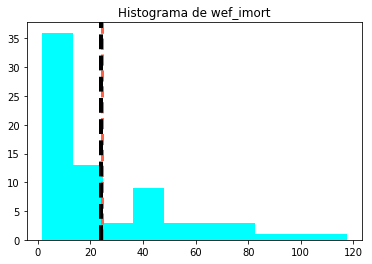

In [561]:
graficar_histograma(df_base_generada,"wef_imort",True,True)

# 4b) who_alc2000 : Alcohol consumption per capita (2000-)

Promedio total 4.949340671727473
Media Muestral: Roja
Media Total: Negra


((array([22., 11., 12.,  4.,  6.,  8.,  9., 10.,  4.,  3.]),
  array([ 0.   ,  1.394,  2.788,  4.182,  5.576,  6.97 ,  8.364,  9.758,
         11.152, 12.546, 13.94 ]),
  <a list of 10 Patch objects>),
 <matplotlib.lines.Line2D at 0x12c4a27dac8>)

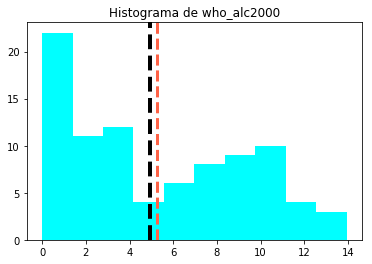

In [562]:
graficar_histograma(df_base_generada,"who_alc2000",True,True)

# 4c) who_tobt : Current smoking of any tobacco product (Total).

Promedio total 23.285483875000008
Media Muestral: Roja
Media Total: Negra


((array([ 5.,  4.,  8., 10., 12.,  8.,  3.,  5.,  0.,  1.]),
  array([ 4.6999998 ,  9.12000002, 13.54000024, 17.96000046, 22.38000068,
         26.8000009 , 31.22000112, 35.64000134, 40.06000156, 44.48000178,
         48.900002  ]),
  <a list of 10 Patch objects>),
 <matplotlib.lines.Line2D at 0x12c4a2f2898>)

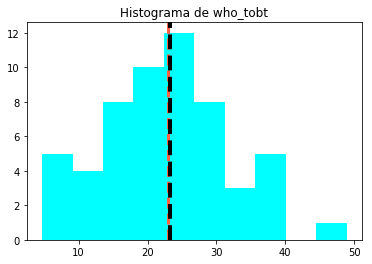

In [563]:
graficar_histograma(df_base_generada,"who_tobt",True,True)

# 4d) wdi_exph : Government expenditure on health, total (% of GDP)

Promedio total 6.783758504767167
Media Muestral: Roja
Media Total: Negra


((array([11., 18., 16., 22., 12.,  8.,  4.,  1.,  0.,  2.]),
  array([ 2.06738615,  3.57472301,  5.08205986,  6.58939672,  8.09673357,
          9.60407043, 11.11140728, 12.61874413, 14.12608099, 15.63341784,
         17.1407547 ]),
  <a list of 10 Patch objects>),
 <matplotlib.lines.Line2D at 0x12c4a525240>)

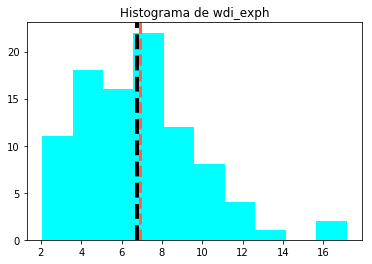

In [564]:
graficar_histograma(df_base_generada,"wdi_exph",True,True)

# Analisis Resultados dotplot
# Media
- Tanto las medias de wef_imort, who_alc2000 y wdi_exph muestran una media muestral levemente mayor a la media total.
- La variable who_tobt muestra un promedio muestral similar a la media total.
Finalmente la variable who_tobt es la que muestra un comportamiento mas similiar a una distribucion normal de sus datos.

# 5. Genere una función que devuelva un dotplot
* La función debe contener los siguientes argumentos como argumentos:
* dataframe : La tabla de datos donde buscar las variables.
* plot_var : La variable a analizar y extraer las medias.
* plot_by : La variable agrupadora.
* global_stat : Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False .
* statistic: Debe presentar dos opciones. mean para la media y median para la mediana. Por defecto debe ser mean .
* Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

* Se comenzará obteniendo la mediana de la variable del dataframe completo

In [565]:
def mediana_total(columna):
    global df
    a=df[columna].median()
    return a
print("La mediana total es: ",round(mediana_total("undp_hdi"),3))

La mediana total es:  0.726


In [566]:
def graficar_dotPlot(dataframe,plot_var,plot_by,global_stat,statistic):
    """
    -Esta funcion muestra el dotPlot de un dataframe a partir de una variable de estudio
    -Su argumento exige:
    * dataframe : La tabla de datos donde buscar las variables.
    * plot_var : La variable a analizar y extraer las medias.
    * plot_by : La variable agrupadora.
    * global_stat : Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False .
     statistic: Debe presentar dos opciones. mean para la media y median para la mediana. Por defecto debe ser mean .
    -Retorna un histograma de la variable solicitada.
    
    """
    groupby_means = dataframe.groupby(plot_by)[plot_var].mean()
    promedio_total= media_total(plot_var)
    mediana_total1 = mediana_total(plot_var)
    df_dropna=dataframe[plot_var].dropna()
    
    g= plt.plot(groupby_means.values,groupby_means.index,"o",color="m")
    plt.title(label=plot_var+" vs "+plot_by)
    #linea_prom_muestra= plt.axvline(df_dropna.mean(),lw=3, color ="blue", linestyle="--")
    #linea_prom_total= plt.axvline(promedio_total,lw=4, color ="green", linestyle="--")
    #linea_mediana_muestra= plt.axvline(df_dropna.median(),lw=3, color ="tomato", linestyle="--")
    #linea_mediana_total= plt.axvline(mediana_total1,lw=4, color ="black", linestyle="--")
    
    if global_stat == True:
        print("Promedio Total: Verde")
        plt.axvline(promedio_total,lw=5, color ="green", linestyle="--")
    if statistic =="mean":
        print("Promedio Muestra: Azul")
        plt.axvline(df_dropna.mean(),lw=3, color ="blue", linestyle="--")
    if statistic == "median":
        print("Mediana Muestra: Roja")
        print("Mediana Total: Negra")
        plt.axvline(df_dropna.median(),lw=3, color ="tomato", linestyle="--")
        plt.axvline(mediana_total1,lw=4, color ="black", linestyle="--")


# Implemente la función en las 3 variables con una menor cantidad de datos perdidos, es decir, a las columnas : gle_cgdpc, wdi_exph y undp_hdi

# <font color='red'>GRÁFICAS dotPlots: </font>

# 5.a) gle_cgdpc

Promedio Total: Verde
Mediana Muestra: Roja
Mediana Total: Negra


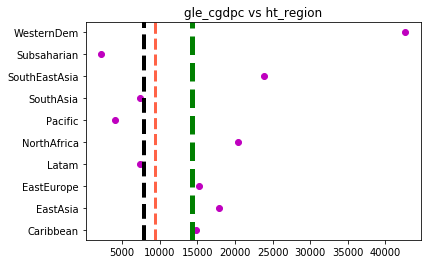

In [579]:
graficar_dotPlot(df_base_generada,"gle_cgdpc","ht_region",True,"median")

# 5.b) wdi_exph

Promedio Total: Verde
Mediana Muestra: Roja
Mediana Total: Negra


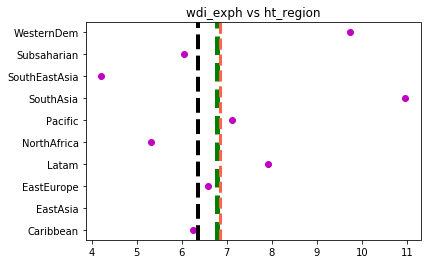

In [580]:
graficar_dotPlot(df_base_generada,"wdi_exph","ht_region",True,"median")

# 5.c) undp_hdi

Promedio Total: Verde
Mediana Muestra: Roja
Mediana Total: Negra


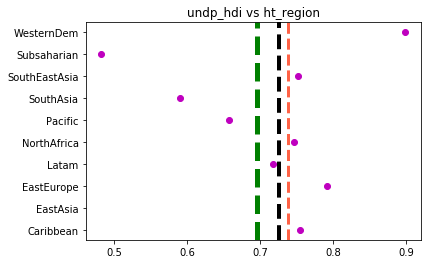

In [582]:
graficar_dotPlot(df_base_generada,"undp_hdi","ht_region",True,"median")

# Analisis Resultados dotplot

# Media
* Como se pudo apreciar desde los graficos dotplot, se pudo comprobar que las variables gle_cgdpc, wdi_exph y undp_hdi disminuyen su diferencia entre el promedio total y la muestra (50% de los datos) respectivamente, y el promedio muestral supera al promedio total de la población. El promedio muestral de la variable undp_hdi es levemente practicamente similar al promedio total.

# Mediana
* Analogamente, el comportamiento de la mediana muestral fue mayor que la mediana total para las variables estudiadas. Observando la graduación de los graficos dotPlot podemos afirmar que la variable undp_hdi considera que la mediana muestral tiene un valor más parecido a la mediana poblacional respecto de las otras variables estudiadas.


# 6. Guarde la base de datos
* La submuestra creada tiene un método llamado to_csv .
* Acceda a éste y guarde la base de datos con la siguiente nomenclatura:
    *subsample_<iniciales>_demo.csv
    *Súbala a la plataforma, junto al desafío 

In [583]:
df_base_generada.to_csv("subsample_pv_demo.csv")